In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import torch
from tqdm.auto import tqdm

import ddpm_Time_Series_copy
import numpy as np
import pandas as pd
import torch

from sklearn.datasets import make_moons
from torch.utils.data import TensorDataset


import ddpm_Time_Series_copy
from ddpm_Time_Series_copy import TimeSeriesDataset , TimeSeriesTestDataset
from noise_scheduler import NoiseScheduler


import torch
from torch.utils.data import Dataset, DataLoader
import argparse
import os

from torch import nn
from torch.nn import functional as F
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import numpy as np

from positional_embeddings import PositionalEmbedding


from pytorch_tcn import TCN  # Import the TCN class from pytorch-tcn

import json

from sklearn.metrics import classification_report, roc_curve, auc

import seaborn as sns


/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Saving figures and results : 

## WSD107

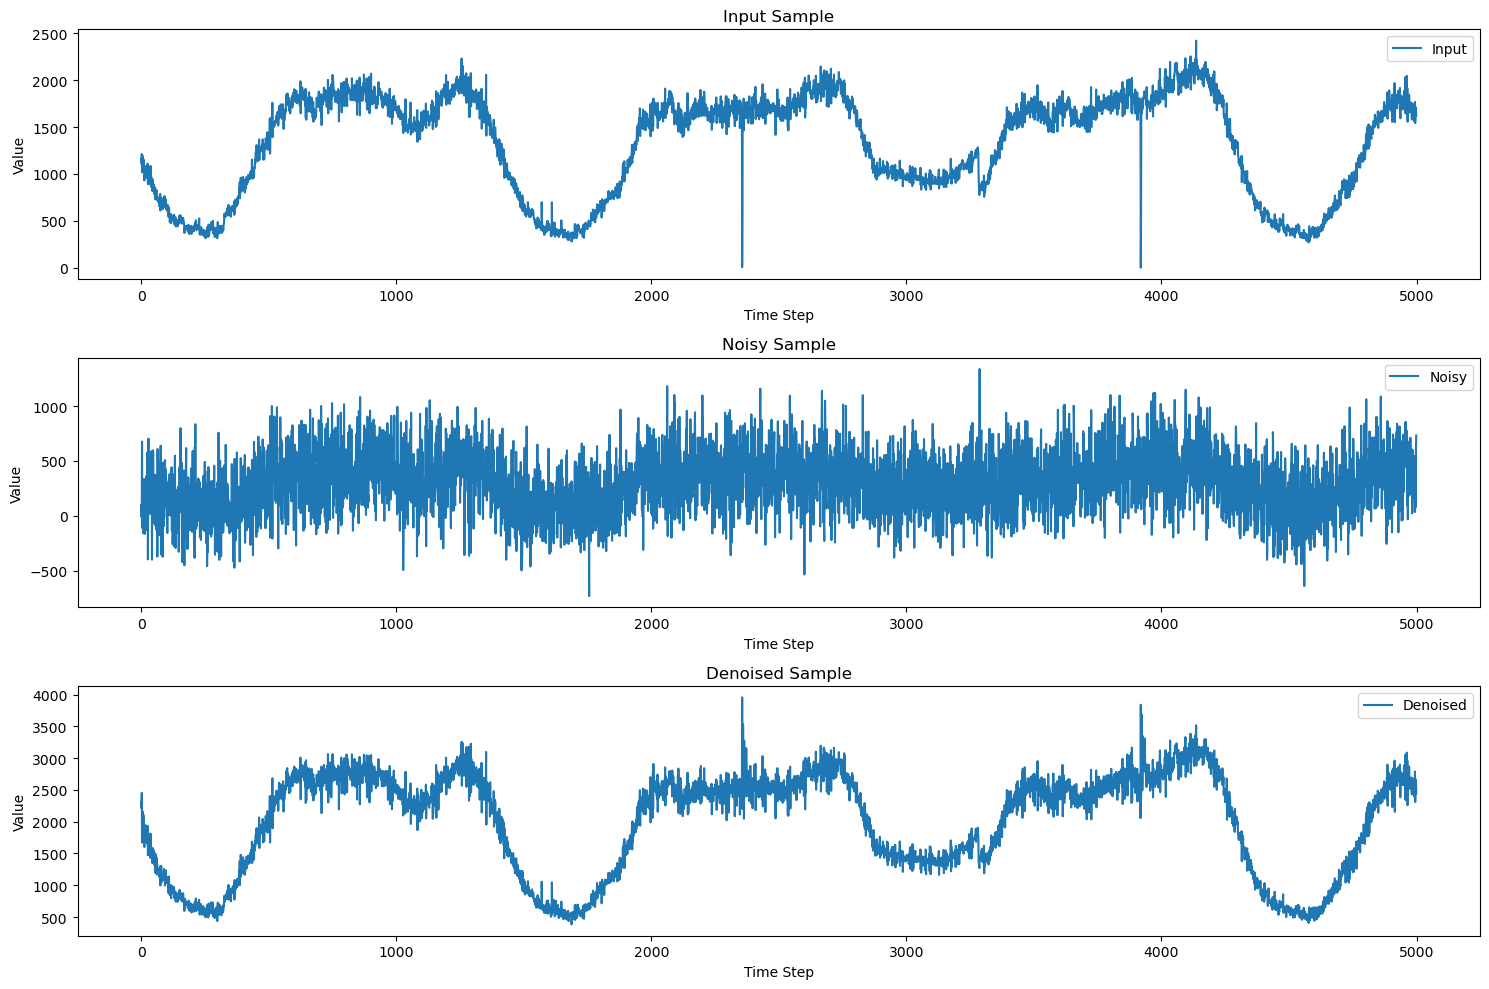

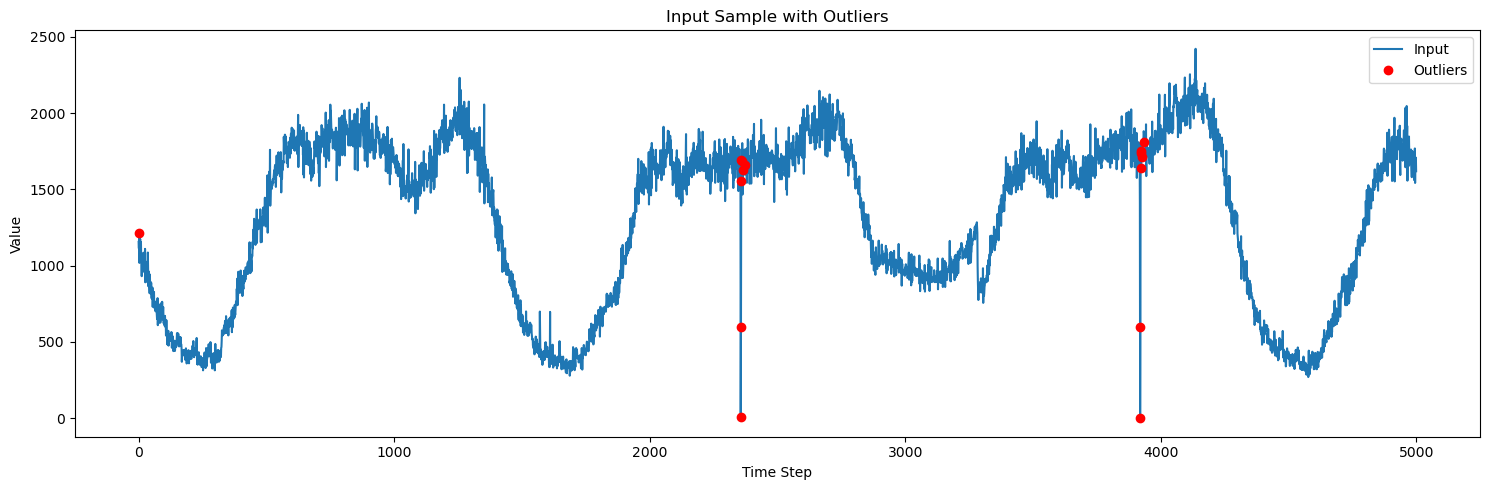

eval timesteps tensor([537, 118,  19, 188, 726, 399, 723, 277, 863, 421, 150, 248, 968, 352,
        256,  21])
Best threshold: tensor(1214.1018)
Best F1 score: 0.4489795918367347
Best AUPRC score: 0.2418549019607843
Best Precision score: 0.7333333333333333
Best Recall score: 0.3235294117647059
Best threshold: tensor(1214.1018)
Best F1 score: 0.3333333333333333
Best AUPRC score: 0.1385217391304348
Best Precision score: 0.55
Best Recall score: 0.2391304347826087
Best threshold: tensor(1214.1018)
Best F1 score: 0.26506024096385544
Best AUPRC score: 0.08902645502645501
Best Precision score: 0.4074074074074074
Best Recall score: 0.19642857142857142
Best threshold: tensor(1108.5278)
Best F1 score: 0.3488372093023256
Best AUPRC score: 0.14212857142857144
Best Precision score: 0.5
Best Recall score: 0.26785714285714285
Best threshold: tensor(1108.5278)
Best F1 score: 0.2988505747126437
Best AUPRC score: 0.10427777777777776
Best Precision score: 0.3333333333333333
Best Recall score: 0.2708333333333333
Best threshold: tensor(1214.1018)
Best F1 score: 0.2937062937062937
Best AUPRC score: 0.11151052631578946
Best Precision score: 0.4375
Best Recall score: 0.22105263157894736
Best threshold: tensor(1108.5278)
Best F1 score: 0.35064935064935066
Best AUPRC score: 0.14366244424620875
Best Precision score: 0.4576271186440678
Best Recall score: 0.28421052631578947
Best threshold: tensor(1108.5278)
Best F1 score: 0.30917874396135264
Best AUPRC score: 0.11097254021698467
Best Precision score: 0.32323232323232326
Best Recall score: 0.2962962962962963
Best threshold: tensor(1214.1018)
Best F1 score: 0.24539877300613497
Best AUPRC score: 0.07307727546714889
Best Precision score: 0.25316455696202533
Best Recall score: 0.23809523809523808
Best threshold: tensor(1108.5278)
Best F1 score: 0.35294117647058826
Best AUPRC score: 0.14386813186813188
Best Precision score: 0.46153846153846156
Best Recall score: 0.2857142857142857
Best threshold: tensor(1214.1018)
Best F1 score: 0.3076923076923077
Best AUPRC score: 0.11631966873706004
Best Precision score: 0.43478260869565216
Best Recall score: 0.23809523809523808
Best threshold: tensor(1214.1018)
Best F1 score: 0.30303030303030304
Best AUPRC score: 0.10299259259259258
Best Precision score: 0.3333333333333333
Best Recall score: 0.2777777777777778
Best threshold: tensor(1214.1018)
Best F1 score: 0.42105263157894735
Best AUPRC score: 0.2039034213098729
Best Precision score: 0.6060606060606061
Best Recall score: 0.3225806451612903
Best threshold: tensor(1214.1018)
Best F1 score: 0.4233576642335766
Best AUPRC score: 0.18830085470085473
Best Precision score: 0.4461538461538462
Best Recall score: 0.4027777777777778
Best threshold: tensor(1214.1018)
Best F1 score: 0.32323232323232326
Best AUPRC score: 0.12260298507462686
Best Precision score: 0.23880597014925373
Best Recall score: 0.5
Best threshold: tensor(1214.1018)
Best F1 score: 0.47368421052631576
Best AUPRC score: 0.23758260869565218
Best Precision score: 0.6
Best Recall score: 0.391304347826087
F1 score: 0.34368654551477423
AUPRC score: 0.14191265590930915
Precision score: 0.4447670561777277
Recall score: 0.2972302286753181

## NAB 

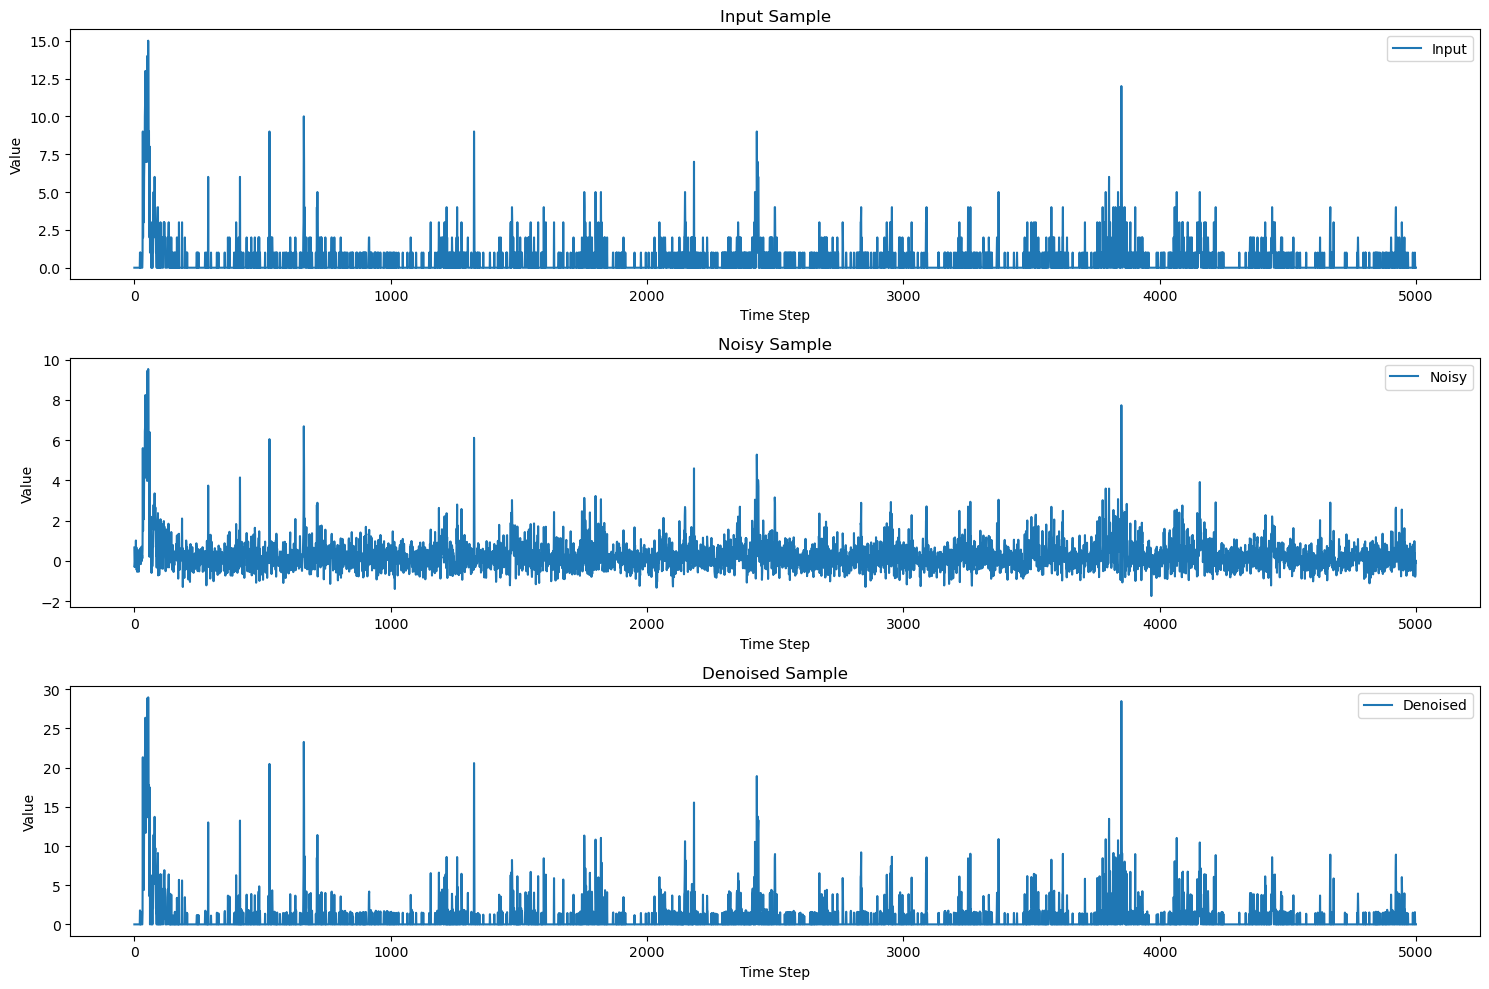

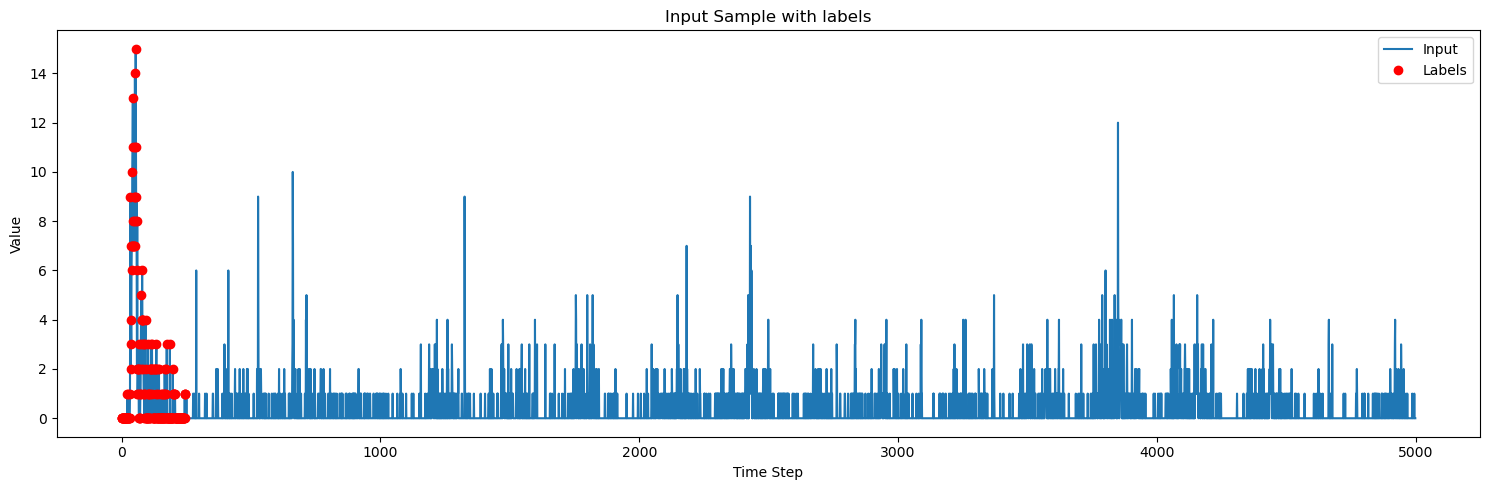

eval timesteps tensor([634, 451, 626, 721])
Best threshold: tensor(2.0974)
Best F1 score: 0.21176470588235294
Best AUPRC score: 0.08645831779102034
Best Precision score: 0.25280898876404495
Best Recall score: 0.18218623481781376
Best threshold: tensor(1.1039)
Best F1 score: 0.027586206896551724
Best AUPRC score: 0.015505956613219183
Best Precision score: 0.01675977653631285
Best Recall score: 0.07792207792207792
Best threshold: tensor(0.5520)
Best F1 score: 0.1319073083778966
Best AUPRC score: 0.08149127348806288
Best Precision score: 0.08638132295719844
Best Recall score: 0.27889447236180903
Best threshold: tensor(0.5520)
Best F1 score: 0.13012895662368112
Best AUPRC score: 0.08106765017749298
Best Precision score: 0.08486238532110092
Best Recall score: 0.27889447236180903
F1 score: 0.1253467944451206
AUPRC score: 0.06613079951744885
Precision score: 0.11020311839466429
Recall score: 0.20447431436587743

# Complete Evaluation

In [2]:
class Config:
    def __init__(self, config_dict):
        for key, value in config_dict.items():
            setattr(self, key, value)

In [3]:
# training testing imports 
import train_test_fonctions
from train_test_fonctions import calculate_f1_auprc_score, plot_samples, plot_predictions, trainer, tester, train_tracker, z_score_outliers, modified_z_score_outliers, iqr_outliers, iqr_collective_outliers
from train_test_fonctions import train_model, test_model, process_directory, trainer_all_in_one

## WSD dataset

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
from pytorch_tcn import TCN  # Import the TCN class from pytorch-tcn

sequence_length = 5000
input_size = 1  # Assuming 1D time series data

base_config = {
  "data_path": "../datasets/UTS/WSD/107",
  "output_dir": "output_WSD",
  "train_batch_size": 16,
  "eval_batch_size": 1,
  "num_epochs": 5,
  
  "learning_rate": 0.0001,
  "num_timesteps": 1000,
  "beta_schedule": "linear",
  "embedding_size": 128,
  "hidden_size": 128,
  "hidden_layers": 3,
  "time_embedding": "sinusoidal",
  "input_embedding": "sinusoidal",
  "save_eval_step": 10,
  "experiment_name": "NonName",
  "beta_start": 0.0001,
  "beta_end": 0.02,
  "save_model_epochs": 1
}

In [ ]:
import os

data_folder = "../datasets/UTS/NAB"

for root, dirs, files in os.walk(data_folder):
    for dir in dirs:
        data_path = os.path.join(data_folder, dir)
    
        # change datapath in the config
        base_config["data_path"] = data_path
        base_config["output_dir"] = os.path.join("output_WSD", dir)
        
        print(base_config)
        # Create Config object
        config = Config(base_config)
        
        print(config.data_path)

        # Initialize the new TCN model
        model = TCN(
            num_inputs=input_size,  # Number of input channels
            num_channels=[64, 128, 256, 512,256,128,64,1],  # Number of channels in each residual block
            kernel_size=3,  # Size of the convolution kernel
            dilations=None,  # Dilation sizes
            dilation_reset=None,  # Reset dilation size
            dropout=0.2,  # Dropout rate
            causal=True,  # Causal convolutions for real-time applications
            use_norm='weight_norm',  # Normalization method
            activation='relu',  # Activation function
            kernel_initializer='xavier_uniform',  # Weight initializer
            use_skip_connections=False,  # Skip connections
            input_shape='NLC',  # Input shape format ('NCL' or 'NLC') [16, 5000, 1] for NLC
            embedding_shapes=None,  # Embedding shapes
            embedding_mode='add',  # Embedding mode ('add' or 'concat')
            use_gate=False,  # Use gated linear unit
            lookahead=0,  # Lookahead for future time steps
            output_projection=None,  # Output projection
            output_activation=None,  # Output activation
        )

        noise_scheduler = NoiseScheduler(
            num_timesteps=config.num_timesteps,
            beta_start=config.beta_start,
            beta_end=config.beta_end,
            beta_schedule=config.beta_schedule
        )

        # Set up dataset and dataloader
        dataset = TimeSeriesDataset(config.data_path,sequence_length=5000, stride=500,normalize=False)

        # Set up dataset and dataloader for test data
        test_dataset = TimeSeriesTestDataset(config.data_path, sequence_length=5000, stride=500, normalize=False) #mean=dataset.mean, std=dataset.std)

        #================================================================================================
        # define a pd dataframe to save the results, with the data folder name as the index
        results_df = pd.DataFrame(columns=["data_folder", "average_f1", "average_auprc"])
        results_df.set_index("data_folder", inplace=True)
        
        # train the model and test it
        model, losses = trainer(config, model, noise_scheduler, dataset)
        train_tracker(config, model, dataset)
        average_f1, average_auprc = tester(config, model, noise_scheduler, test_dataset)
        
        # save the results in the dataframe
        results_df.loc[dir] = [average_f1, average_auprc]
        
        print("training and results done for", dir)
        
# save the results in a csv file in outtput directory
results_df.to_csv(os.path.join(config.output_dir, "results.csv"))


# NAB dataset - all in one 

In [11]:

base_config = {
  "data_path":  "../datasets/UTS/NAB",
  "output_dir": "output_NAB2",
  "train_batch_size": 2,
  "eval_batch_size": 1,
  "num_epochs": 15,
  
  "learning_rate": 0.0001,
  "num_timesteps": 100,
  "beta_schedule": "linear",
  "embedding_size": 128,
  "hidden_size": 128,
  "hidden_layers": 3,
  "time_embedding": "sinusoidal",
  "input_embedding": "sinusoidal",
  "save_eval_step": 10,
  "experiment_name": "NonName",
  "beta_start": 0.05,
  "beta_end": 0.1,
  "save_model_epochs": 1
}

sequence_length = 3000
input_size = 1  # Assuming 1D time series data
stride = 100


In [12]:
# all in one training and testing
import os
    
config = Config(base_config)

# Initialize the new TCN model
model = TCN(
    num_inputs=input_size,  # Number of input channels
    num_channels=[32,64, 128, 256,128,64,32,1],  # Number of channels in each residual block
    kernel_size=3,  # Size of the convolution kernel
    dilations=None,  # Dilation sizes
    dilation_reset=None,  # Reset dilation size
    dropout=0.2,  # Dropout rate
    causal=True,  # Causal convolutions for real-time applications
    use_norm='weight_norm',  # Normalization method
    activation='relu',  # Activation function
    kernel_initializer='xavier_uniform',  # Weight initializer
    use_skip_connections=False,  # Skip connections
    input_shape='NLC',  # Input shape format ('NCL' or 'NLC') [16, 5000, 1] for NLC
    embedding_shapes=None,  # Embedding shapes
    embedding_mode='add',  # Embedding mode ('add' or 'concat')
    use_gate=False,  # Use gated linear unit
    lookahead=0,  # Lookahead for future time steps
    output_projection=None,  # Output projection
    output_activation=None,  # Output activation
)

noise_scheduler = NoiseScheduler(
    num_timesteps=config.num_timesteps,
    beta_start=config.beta_start,
    beta_end=config.beta_end,
    beta_schedule=config.beta_schedule
)

data_folder = "../datasets/UTS/NAB"

#================================================================================================
# train the model and test it

model, losses = trainer_all_in_one(sequence_length, stride,base_config, config, model, noise_scheduler, data_folder)


Training model...


  0%|          | 0/15 [00:00<?, ?it/s]

{'loss': 19833.322265625, 'epoch': 0}
{'loss': 4239.23291015625, 'epoch': 0}
{'loss': 30.272310256958008, 'epoch': 0}
{'loss': 0.746690571308136, 'epoch': 0}
{'loss': 575.0128173828125, 'epoch': 0}
{'loss': 143.6855010986328, 'epoch': 0}
{'loss': 10.681514739990234, 'epoch': 0}
{'loss': 172.6847381591797, 'epoch': 0}
{'loss': 1.9785977602005005, 'epoch': 0}


  7%|▋         | 1/15 [00:21<04:57, 21.22s/it]

{'loss': 165.57374572753906, 'epoch': 0}
{'loss': 14196.095703125, 'epoch': 1}
{'loss': 514.7376708984375, 'epoch': 1}
{'loss': 29.507633209228516, 'epoch': 1}
{'loss': 0.5962048172950745, 'epoch': 1}
{'loss': 284.7931213378906, 'epoch': 1}
{'loss': 366.58984375, 'epoch': 1}
{'loss': 10.924768447875977, 'epoch': 1}
{'loss': 440.41632080078125, 'epoch': 1}
{'loss': 1.7585022449493408, 'epoch': 1}


 13%|█▎        | 2/15 [00:43<04:45, 21.93s/it]

{'loss': 204.36184692382812, 'epoch': 1}
{'loss': 37094.54296875, 'epoch': 2}
{'loss': 926.6477661132812, 'epoch': 2}
{'loss': 66.80122375488281, 'epoch': 2}
{'loss': 0.7988555431365967, 'epoch': 2}
{'loss': 294.01837158203125, 'epoch': 2}
{'loss': 106.24774932861328, 'epoch': 2}
{'loss': 17.233867645263672, 'epoch': 2}
{'loss': 387.4459228515625, 'epoch': 2}
{'loss': 1.4233704805374146, 'epoch': 2}


 20%|██        | 3/15 [01:05<04:23, 21.97s/it]

{'loss': 78.10640716552734, 'epoch': 2}
{'loss': 50222.02734375, 'epoch': 3}
{'loss': 1674.5009765625, 'epoch': 3}
{'loss': 8.5639066696167, 'epoch': 3}
{'loss': 0.8186201453208923, 'epoch': 3}
{'loss': 637.802001953125, 'epoch': 3}
{'loss': 254.36099243164062, 'epoch': 3}
{'loss': 13.461077690124512, 'epoch': 3}
{'loss': 527.8169555664062, 'epoch': 3}
{'loss': 1.6923960447311401, 'epoch': 3}


 27%|██▋       | 4/15 [01:27<04:02, 22.01s/it]

{'loss': 179.51597595214844, 'epoch': 3}
{'loss': 45066.81640625, 'epoch': 4}
{'loss': 2311.25341796875, 'epoch': 4}
{'loss': 4.394942760467529, 'epoch': 4}
{'loss': 0.7713930010795593, 'epoch': 4}
{'loss': 319.5506896972656, 'epoch': 4}
{'loss': 523.4664916992188, 'epoch': 4}
{'loss': 24.661531448364258, 'epoch': 4}
{'loss': 38.18892288208008, 'epoch': 4}
{'loss': 1.8450815677642822, 'epoch': 4}


 33%|███▎      | 5/15 [01:49<03:39, 21.94s/it]

{'loss': 176.9255828857422, 'epoch': 4}
{'loss': 31170.4140625, 'epoch': 5}
{'loss': 278.15533447265625, 'epoch': 5}
{'loss': 3.8554956912994385, 'epoch': 5}
{'loss': 0.6470630168914795, 'epoch': 5}
{'loss': 391.7508239746094, 'epoch': 5}
{'loss': 430.9008483886719, 'epoch': 5}
{'loss': 30.13994789123535, 'epoch': 5}
{'loss': 89.50760650634766, 'epoch': 5}
{'loss': 1.7852261066436768, 'epoch': 5}


 40%|████      | 6/15 [02:11<03:16, 21.84s/it]

{'loss': 17.259267807006836, 'epoch': 5}
{'loss': 37033.24609375, 'epoch': 6}
{'loss': 2606.399658203125, 'epoch': 6}
{'loss': 19.352705001831055, 'epoch': 6}
{'loss': 0.6862888932228088, 'epoch': 6}
{'loss': 598.5009765625, 'epoch': 6}
{'loss': 363.83038330078125, 'epoch': 6}
{'loss': 7.094970703125, 'epoch': 6}
{'loss': 289.1735534667969, 'epoch': 6}
{'loss': 2.1004841327667236, 'epoch': 6}


 47%|████▋     | 7/15 [02:33<02:55, 21.92s/it]

{'loss': 153.683349609375, 'epoch': 6}
{'loss': 18765.494140625, 'epoch': 7}
{'loss': 1711.6368408203125, 'epoch': 7}
{'loss': 9.182994842529297, 'epoch': 7}
{'loss': 0.7803716659545898, 'epoch': 7}
{'loss': 357.8640441894531, 'epoch': 7}
{'loss': 55.155364990234375, 'epoch': 7}
{'loss': 18.720163345336914, 'epoch': 7}
{'loss': 212.98619079589844, 'epoch': 7}
{'loss': 1.9455790519714355, 'epoch': 7}


 53%|█████▎    | 8/15 [02:55<02:33, 21.96s/it]

{'loss': 86.46408081054688, 'epoch': 7}
{'loss': 24450.63671875, 'epoch': 8}
{'loss': 883.8931884765625, 'epoch': 8}
{'loss': 9.870085716247559, 'epoch': 8}
{'loss': 0.7996362447738647, 'epoch': 8}
{'loss': 552.9149780273438, 'epoch': 8}
{'loss': 411.8745422363281, 'epoch': 8}
{'loss': 18.589313507080078, 'epoch': 8}
{'loss': 301.31915283203125, 'epoch': 8}
{'loss': 1.9667434692382812, 'epoch': 8}


 60%|██████    | 9/15 [03:17<02:12, 22.06s/it]

{'loss': 94.89261627197266, 'epoch': 8}
{'loss': 47448.65234375, 'epoch': 9}
{'loss': 656.6497802734375, 'epoch': 9}
{'loss': 39.43011474609375, 'epoch': 9}
{'loss': 0.5448604226112366, 'epoch': 9}
{'loss': 357.919921875, 'epoch': 9}
{'loss': 53.60316848754883, 'epoch': 9}
{'loss': 17.60310935974121, 'epoch': 9}
{'loss': 489.95098876953125, 'epoch': 9}
{'loss': 1.3467354774475098, 'epoch': 9}


 67%|██████▋   | 10/15 [03:41<01:53, 22.61s/it]

{'loss': 14.9343843460083, 'epoch': 9}
{'loss': 33144.2421875, 'epoch': 10}
{'loss': 2820.62744140625, 'epoch': 10}
{'loss': 13.714484214782715, 'epoch': 10}
{'loss': 0.6878971457481384, 'epoch': 10}
{'loss': 264.14093017578125, 'epoch': 10}
{'loss': 373.7814025878906, 'epoch': 10}
{'loss': 24.555957794189453, 'epoch': 10}
{'loss': 326.2397155761719, 'epoch': 10}
{'loss': 1.4476081132888794, 'epoch': 10}


 73%|███████▎  | 11/15 [04:03<01:29, 22.49s/it]

{'loss': 3.472785711288452, 'epoch': 10}
{'loss': 30282.4296875, 'epoch': 11}
{'loss': 858.9436645507812, 'epoch': 11}
{'loss': 94.81513214111328, 'epoch': 11}
{'loss': 0.6549561619758606, 'epoch': 11}
{'loss': 49.29861831665039, 'epoch': 11}
{'loss': 446.1933288574219, 'epoch': 11}
{'loss': 17.408763885498047, 'epoch': 11}
{'loss': 330.70269775390625, 'epoch': 11}
{'loss': 1.80668306350708, 'epoch': 11}


 80%|████████  | 12/15 [04:25<01:07, 22.40s/it]

{'loss': 37.66914749145508, 'epoch': 11}
{'loss': 47470.74609375, 'epoch': 12}
{'loss': 1163.38330078125, 'epoch': 12}
{'loss': 4.987076282501221, 'epoch': 12}
{'loss': 0.7690262198448181, 'epoch': 12}
{'loss': 95.16889953613281, 'epoch': 12}
{'loss': 302.10772705078125, 'epoch': 12}
{'loss': 16.19168472290039, 'epoch': 12}
{'loss': 353.6694641113281, 'epoch': 12}
{'loss': 1.577162265777588, 'epoch': 12}


 87%|████████▋ | 13/15 [04:48<00:45, 22.53s/it]

{'loss': 50.651641845703125, 'epoch': 12}
{'loss': 7639.5361328125, 'epoch': 13}
{'loss': 1650.4534912109375, 'epoch': 13}
{'loss': 6.308995246887207, 'epoch': 13}
{'loss': 0.6622914671897888, 'epoch': 13}
{'loss': 376.5109558105469, 'epoch': 13}
{'loss': 55.82194900512695, 'epoch': 13}
{'loss': 18.014257431030273, 'epoch': 13}
{'loss': 336.4021911621094, 'epoch': 13}
{'loss': 2.1997509002685547, 'epoch': 13}


 93%|█████████▎| 14/15 [05:10<00:22, 22.40s/it]

{'loss': 38.14509201049805, 'epoch': 13}
{'loss': 34383.80859375, 'epoch': 14}
{'loss': 291.1434020996094, 'epoch': 14}
{'loss': 64.49349212646484, 'epoch': 14}
{'loss': 0.6208725571632385, 'epoch': 14}
{'loss': 196.15647888183594, 'epoch': 14}
{'loss': 535.1624145507812, 'epoch': 14}
{'loss': 11.0466890335083, 'epoch': 14}
{'loss': 341.0523681640625, 'epoch': 14}
{'loss': 1.9249677658081055, 'epoch': 14}


100%|██████████| 15/15 [05:33<00:00, 22.23s/it]

{'loss': 114.18258666992188, 'epoch': 14}


In [20]:
model.eval()
eval_batch_size = config.eval_batch_size

for root, dirs, files in os.walk(data_folder):
    for dir in dirs:
        data_path = os.path.join(data_folder, dir)
    
        # change datapath in the config
        base_config["data_path"] = data_path
        
        config = Config(base_config)
        
        # Set up dataset and dataloader for test data
        test_dataset = TimeSeriesTestDataset(config.data_path, sequence_length=2500, stride=2500, normalize=False) #mean=dataset.mean, std=dataset.std)

        # print the len of test dataset
        print("number of batch", len(test_dataset))

        # Create dataloader for the test dataset
        test_dataloader = DataLoader(test_dataset, batch_size=config.eval_batch_size, shuffle=False, drop_last=True)


        for step, (sample,labels) in enumerate(tqdm(test_dataloader)): #  timestamps, 
            std_data = torch.std(sample)
            
            # after sapling random noise, predict using the model to denoise the sample
            with torch.no_grad():
                
                # Model denoising steps 
                
                timesteps = torch.randint(0, noise_scheduler.num_timesteps, (eval_batch_size,)).long()
                #print("eval timesteps", timesteps)

                timesteps = torch.tensor([30])
                
                noise = torch.randn_like(sample) 
                noisy_sample = noise_scheduler.add_noise(sample, noise, timesteps)
                
                noisy_sample = noisy_sample.unsqueeze(-1)
                sample = sample.unsqueeze(-1)
                denoised_sample = model(noisy_sample)

                #plot_samples(sample[0], noisy_sample[0], denoised_sample[0])
                
                # ===================================================================================
                # Preddict outlier points 
                threshold = std_data
                
                outliers = (torch.abs(sample - denoised_sample) > threshold).cpu().numpy()
                z_score_out = z_score_outliers(sample, denoised_sample)
                mod_z_score_out = modified_z_score_outliers(sample, denoised_sample)
                iqr_out = iqr_outliers(sample, denoised_sample)
                
                
                labels = labels.cpu().numpy()

                # classification report 
                """print("Classification report")
                print(classification_report(labels[0], outliers[0]))
                
                print("Z-score outliers classification report")
                print(classification_report(labels[0], z_score_out[0]))
                
                print("Modified Z-score outliers classification report")
                print(classification_report(labels[0], mod_z_score_out[0]))"""
                
                print("IQR outliers classification report")
                print(classification_report(labels[0], iqr_out[0]))
                
                from Evaluations.utils import f1_score

                print(f1_score(iqr_out[0], labels[0]))
                """plot_predictions(sample, denoised_sample, iqr_out, labels)
                
                collective_anomalies = iqr_collective_outliers(sample, denoised_sample, threshold=1.5, window_size=100, density_threshold=0.5, smoothing_sigma=None)

                print("classification report for collective anomalies")
                print(classification_report(labels[0], collective_anomalies[0]))"""
                
            break
    break
             



number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]


IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      2102
         1.0       0.51      0.32      0.39       398

    accuracy                           0.84      2500
   macro avg       0.70      0.63      0.65      2500
weighted avg       0.82      0.84      0.83      2500

(0.1222340557275537, 0.1592, 0.0992)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]


IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.91      2104
         1.0       0.42      0.11      0.18       396

    accuracy                           0.83      2500
   macro avg       0.64      0.54      0.54      2500
weighted avg       0.78      0.83      0.79      2500

(0.06739085487077501, 0.1584, 0.0428)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]


IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      2151
         1.0       0.57      0.39      0.47       349

    accuracy                           0.87      2500
   macro avg       0.74      0.67      0.70      2500
weighted avg       0.86      0.87      0.86      2500

(0.11376570458404026, 0.1396, 0.096)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]

IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      2253
         1.0       0.28      0.31      0.29       247

    accuracy                           0.85      2500
   macro avg       0.60      0.61      0.61      2500
weighted avg       0.86      0.85      0.86      2500



  0%|          | 0/1 [00:00<?, ?it/s]


(0.10319535783365522, 0.0988, 0.108)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]

IQR outliers classification report


  0%|          | 0/1 [00:00<?, ?it/s]


              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      2010
         1.0       0.13      0.04      0.06       490

    accuracy                           0.75      2500
   macro avg       0.46      0.49      0.46      2500
weighted avg       0.67      0.75      0.70      2500

(0.09874809160305306, 0.196, 0.066)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]

IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2102
         1.0       0.74      0.52      0.61       398

    accuracy                           0.89      2500
   macro avg       0.83      0.74      0.78      2500
weighted avg       0.89      0.89      0.89      2500

(0.1312165435745933, 0.1592, 0.1116)


number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]

IQR outliers classification report
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      2500
         1.0       0.00      0.00      0.00         0

    accuracy                           0.95      2500
   macro avg       0.50      0.48      0.49      2500
weighted avg       1.00      0.95      0.98      2500



/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

(0.0, 0.0, 0.0)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

IQR outliers classification report
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      2500
         1.0       0.00      0.00      0.00         0

    accuracy                           0.93      2500
   macro avg       0.50      0.46      0.48      2500
weighted avg       1.00      0.93      0.96      2500

(0.0, 0.0, 0.0)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

IQR outliers classification report
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      2500
         1.0       0.00      0.00      0.00         0

    accuracy                           0.94      2500
   macro avg       0.50      0.47      0.48      2500
weighted avg       1.00      0.94      0.97      2500



  0%|          | 0/1 [00:00<?, ?it/s]


(0.0, 0.0, 0.0)
number of batch 3


  0%|          | 0/1 [00:00<?, ?it/s]

IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2182
         1.0       0.55      0.27      0.36       318

    accuracy                           0.88      2500
   macro avg       0.72      0.62      0.65      2500
weighted avg       0.86      0.88      0.86      2500



  0%|          | 0/1 [00:00<?, ?it/s]

(0.08479999999999956, 0.1272, 0.0636)



Processing directory: Twitter_volume_AAPL
Number of batches: 2


100%|██████████| 2/2 [00:00<00:00, 35.60it/s]



IQR outliers classification report for Twitter_volume_AAPL
              precision    recall  f1-score   support

         0.0       0.96      0.73      0.83      5602
         1.0       0.13      0.59      0.22       398

    accuracy                           0.72      6000
   macro avg       0.55      0.66      0.52      6000
weighted avg       0.91      0.72      0.79      6000

ROC AUC: 0.7174

Processing directory: Twitter_volume_AMZN
Number of batches: 2


100%|██████████| 2/2 [00:00<00:00, 63.46it/s]



IQR outliers classification report for Twitter_volume_AMZN
              precision    recall  f1-score   support

         0.0       0.90      0.48      0.63      5208
         1.0       0.16      0.67      0.26       792

    accuracy                           0.51      6000
   macro avg       0.53      0.57      0.45      6000
weighted avg       0.81      0.51      0.58      6000

ROC AUC: 0.6349

Processing directory: Twitter_volume_CRM
Number of batches: 2


100%|██████████| 2/2 [00:00<00:00, 54.14it/s]



IQR outliers classification report for Twitter_volume_CRM
              precision    recall  f1-score   support

         0.0       0.97      0.86      0.91      5651
         1.0       0.19      0.51      0.27       349

    accuracy                           0.84      6000
   macro avg       0.58      0.69      0.59      6000
weighted avg       0.92      0.84      0.87      6000

ROC AUC: 0.7904

Processing directory: Twitter_volume_CVS
Number of batches: 2


100%|██████████| 2/2 [00:00<00:00, 46.30it/s]



IQR outliers classification report for Twitter_volume_CVS
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      5355
         1.0       0.17      0.28      0.21       645

    accuracy                           0.77      6000
   macro avg       0.54      0.55      0.54      6000
weighted avg       0.83      0.77      0.80      6000

ROC AUC: 0.6077

Processing directory: Twitter_volume_FB
Number of batches: 2


100%|██████████| 2/2 [00:00<00:00, 47.36it/s]



IQR outliers classification report for Twitter_volume_FB
              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76      5208
         1.0       0.08      0.18      0.11       792

    accuracy                           0.62      6000
   macro avg       0.46      0.43      0.43      6000
weighted avg       0.74      0.62      0.67      6000

ROC AUC: 0.4175

Processing directory: Twitter_volume_GOOG
Number of batches: 2


100%|██████████| 2/2 [00:00<00:00, 47.19it/s]



IQR outliers classification report for Twitter_volume_GOOG
              precision    recall  f1-score   support

         0.0       0.99      0.75      0.86      5602
         1.0       0.21      0.89      0.33       398

    accuracy                           0.76      6000
   macro avg       0.60      0.82      0.60      6000
weighted avg       0.94      0.76      0.82      6000

ROC AUC: 0.9093

Processing directory: Twitter_volume_IBM
Number of batches: 2


100%|██████████| 2/2 [00:00<00:00, 57.87it/s]
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/


IQR outliers classification report for Twitter_volume_IBM
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      6000
         1.0       0.00      0.00      0.00         0

    accuracy                           0.85      6000
   macro avg       0.50      0.43      0.46      6000
weighted avg       1.00      0.85      0.92      6000

ROC AUC: nan

Processing directory: Twitter_volume_KO
Number of batches: 2


100%|██████████| 2/2 [00:00<00:00, 46.56it/s]



IQR outliers classification report for Twitter_volume_KO
              precision    recall  f1-score   support

         0.0       0.82      0.76      0.79      4940
         1.0       0.16      0.21      0.18      1060

    accuracy                           0.66      6000
   macro avg       0.49      0.48      0.48      6000
weighted avg       0.70      0.66      0.68      6000

ROC AUC: 0.4942

Processing directory: Twitter_volume_PFE
Number of batches: 2


100%|██████████| 2/2 [00:00<00:00, 56.19it/s]



IQR outliers classification report for Twitter_volume_PFE
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92      5602
         1.0       0.11      0.16      0.13       398

    accuracy                           0.86      6000
   macro avg       0.53      0.54      0.53      6000
weighted avg       0.88      0.86      0.87      6000

ROC AUC: 0.5014

Processing directory: Twitter_volume_UPS
Number of batches: 2


100%|██████████| 2/2 [00:00<00:00, 46.89it/s]



IQR outliers classification report for Twitter_volume_UPS
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.93      5682
         1.0       0.18      0.42      0.25       318

    accuracy                           0.87      6000
   macro avg       0.57      0.66      0.59      6000
weighted avg       0.92      0.87      0.89      6000

ROC AUC: 0.6258

Overall IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85     54850
         1.0       0.14      0.39      0.21      5150

    accuracy                           0.75     60000
   macro avg       0.54      0.59      0.53     60000
weighted avg       0.86      0.75      0.79     60000



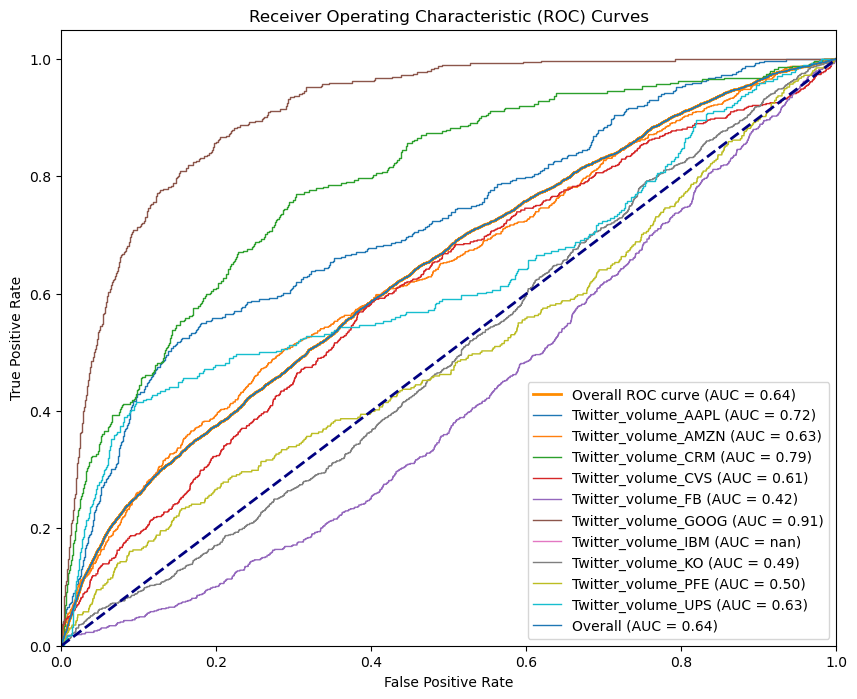


Overall ROC AUC: 0.6375


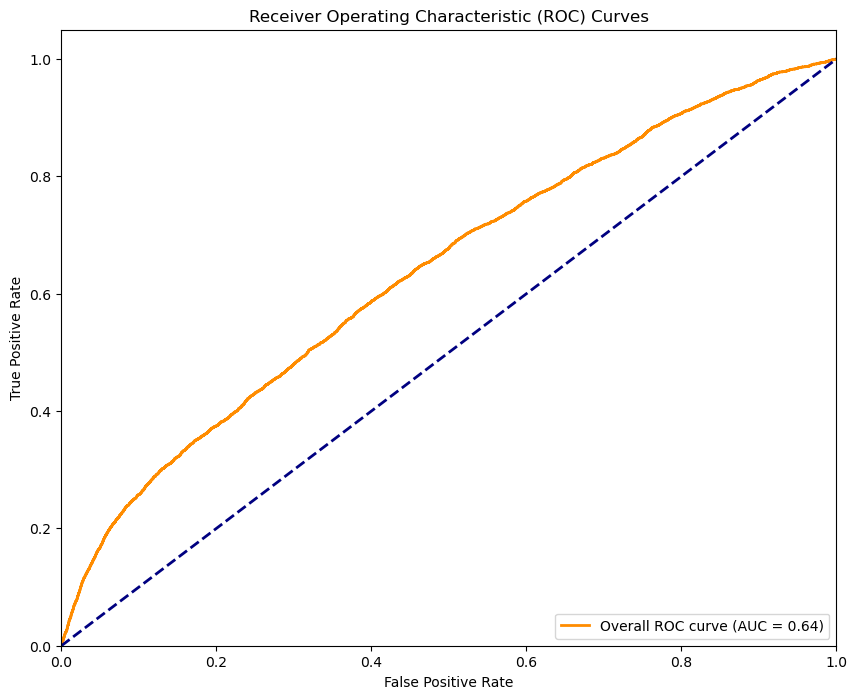

In [13]:
# evaluation with roc curve and classification report 
from sklearn.metrics import classification_report, roc_curve, auc

model.eval()
eval_batch_size = config.eval_batch_size

all_dir_results = []

for root, dirs, files in os.walk(data_folder):
    for dir in dirs:
        data_path = os.path.join(data_folder, dir)
        print(f"\nProcessing directory: {dir}")
    
        # change datapath in the config
        base_config["data_path"] = data_path
        config = Config(base_config)
        
        # Set up dataset and dataloader for test data
        test_dataset = TimeSeriesTestDataset(config.data_path, sequence_length=sequence_length , stride=sequence_length , normalize=False)
        print("Number of batches:", len(test_dataset))

        # Create dataloader for the test dataset
        test_dataloader = DataLoader(test_dataset, batch_size=config.eval_batch_size, shuffle=False, drop_last=True)

        all_labels = []
        all_scores = []

        for step, (sample, labels) in enumerate(tqdm(test_dataloader)):
            std_data = torch.std(sample)
            
            with torch.no_grad():
                timesteps = torch.tensor([70])
                
                noise = torch.randn_like(sample) 
                noisy_sample = noise_scheduler.add_noise(sample, noise, timesteps)
                
                noisy_sample = noisy_sample.unsqueeze(-1)
                sample = sample.unsqueeze(-1)
                denoised_sample = model(noisy_sample)

                # Calculate IQR outliers
                iqr_out, iqr_scores = iqr_outliers(sample, denoised_sample)
                
                labels = labels.cpu().numpy()

                # Store labels and scores
                all_labels.extend(labels.reshape(-1))
                all_scores.extend(iqr_scores.reshape(-1))

        # Calculate metrics for this directory
        fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
        roc_auc = auc(fpr, tpr)
        
        print("\nIQR outliers classification report for", dir)
        print(classification_report(all_labels, (np.array(all_scores) > 1.5).astype(int)))
        print(f"ROC AUC: {roc_auc:.4f}")

        # Store results for this directory
        all_dir_results.append({
            'dir': dir,
            'labels': all_labels,
            'scores': all_scores,
            'fpr': fpr,
            'tpr': tpr,
            'roc_auc': roc_auc
        })

# Compute overall metrics
all_labels = np.concatenate([res['labels'] for res in all_dir_results])
all_scores = np.concatenate([res['scores'] for res in all_dir_results])

print("\nOverall IQR outliers classification report")
print(classification_report(all_labels, (np.array(all_scores) > 1.5).astype(int)))

fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
roc_auc = auc(fpr, tpr)

all_dir_results.append({
    'dir': 'Overall',
    'labels': all_labels,
    'scores': all_scores,
    'fpr': fpr,
    'tpr': tpr,
    'roc_auc': roc_auc
})

#save the results in a csv file
results_df = pd.DataFrame(all_dir_results)
results_df.to_csv(os.path.join(config.output_dir, f"allinone_roc_resultsf{config.num_epochs}.csv"))

# Plot overall ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Overall ROC curve (AUC = {roc_auc:.2f})')

# Plot ROC curves for each directory
for res in all_dir_results:
    plt.plot(res['fpr'], res['tpr'], lw=1, label=f"{res['dir']} (AUC = {res['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.savefig(os.path.join(config.output_dir, f"all_in_one_roc_curves_{config.num_epochs}.png"))
plt.legend(loc="lower right")
plt.show()


print(f"\nOverall ROC AUC: {roc_auc:.4f}")

# plot ans save only the overall roc curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Overall ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.savefig(os.path.join(config.output_dir, f"all_in_one_overall_roc_curve_{config.num_epochs}.png"))
plt.show()


In [14]:
# ROC AUC score distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming all_dir_results is already populated with results from each directory

# Extract AUC-ROC scores for the box plot
auc_scores = [res['roc_auc'] for res in all_dir_results if res['dir'] != 'Overall']

# Create the figure
plt.figure(figsize=(6, 8))  # Adjust the width to make it narrower

# Plot AUC-ROC box plot
sns.boxplot(y=auc_scores, color='lightpink', width=0.3)  # Reduced width for a narrower box

# Set the y-axis limits from 0 to 1
plt.ylim(0, 1)

# Customize the plot
plt.ylabel('AUC-ROC')
plt.title('Distribution of AUC-ROC Scores')

# Remove x-axis label and ticks
plt.xlabel('')
plt.xticks([])

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure
plt.tight_layout()
plt.savefig(os.path.join(config.output_dir, f"allin_one_auc_roc_distribution_{config.num_epochs}.png"))
plt.close()

# Print summary statistics
print(f"\nAUC-ROC Score Distribution:")
print(f"Mean: {np.mean(auc_scores):.4f}")
print(f"Median: {np.median(auc_scores):.4f}")
print(f"Min: {np.min(auc_scores):.4f}")
print(f"Max: {np.max(auc_scores):.4f}")


AUC-ROC Score Distribution:
Mean: nan
Median: nan
Min: nan
Max: nan


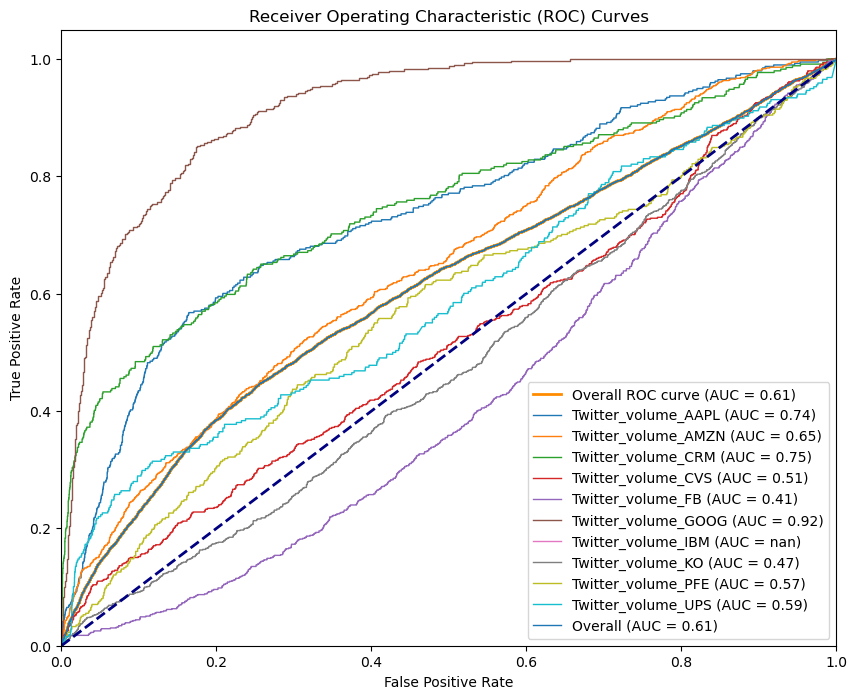

Processing directory: Twitter_volume_AAPL
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 35.64it/s]

IQR outliers classification report for Twitter_volume_AAPL
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84      5602
         1.0       0.15      0.65      0.25       398

    accuracy                           0.74      6000
   macro avg       0.56      0.69      0.54      6000
weighted avg       0.91      0.74      0.80      6000

ROC AUC: 0.7355

Processing directory: Twitter_volume_AMZN
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 33.58it/s]

IQR outliers classification report for Twitter_volume_AMZN
              precision    recall  f1-score   support

         0.0       0.91      0.49      0.64      5208
         1.0       0.17      0.68      0.27       792

    accuracy                           0.52      6000
   macro avg       0.54      0.58      0.45      6000
weighted avg       0.81      0.52      0.59      6000

ROC AUC: 0.6455

Processing directory: Twitter_volume_CRM
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 51.49it/s]

IQR outliers classification report for Twitter_volume_CRM
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      5651
         1.0       0.27      0.44      0.34       349

    accuracy                           0.90      6000
   macro avg       0.62      0.68      0.64      6000
weighted avg       0.92      0.90      0.91      6000

ROC AUC: 0.7483

Processing directory: Twitter_volume_CVS
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 56.72it/s]

IQR outliers classification report for Twitter_volume_CVS
              precision    recall  f1-score   support

         0.0       0.91      0.16      0.27      5355
         1.0       0.11      0.86      0.20       645

    accuracy                           0.24      6000
   macro avg       0.51      0.51      0.23      6000
weighted avg       0.82      0.24      0.27      6000

ROC AUC: 0.5144

Processing directory: Twitter_volume_FB
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 56.48it/s]

IQR outliers classification report for Twitter_volume_FB
              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80      5208
         1.0       0.07      0.13      0.09       792

    accuracy                           0.68      6000
   macro avg       0.46      0.44      0.45      6000
weighted avg       0.75      0.68      0.71      6000

ROC AUC: 0.4144

Processing directory: Twitter_volume_GOOG
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 48.63it/s]

IQR outliers classification report for Twitter_volume_GOOG

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      5602
         1.0       0.25      0.85      0.39       398

    accuracy                           0.82      6000
   macro avg       0.62      0.84      0.64      6000
weighted avg       0.94      0.82      0.86      6000

ROC AUC: 0.9162

Processing directory: Twitter_volume_IBM
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 56.92it/s]
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

IQR outliers classification report for Twitter_volume_IBM
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      6000
         1.0       0.00      0.00      0.00         0

    accuracy                           0.92      6000
   macro avg       0.50      0.46      0.48      6000
weighted avg       1.00      0.92      0.96      6000

ROC AUC: nan

Processing directory: Twitter_volume_KO
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 56.68it/s]

IQR outliers classification report for Twitter_volume_KO
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83      4940
         1.0       0.16      0.15      0.15      1060

    accuracy                           0.71      6000
   macro avg       0.49      0.49      0.49      6000
weighted avg       0.70      0.71      0.71      6000

ROC AUC: 0.4741

Processing directory: Twitter_volume_PFE
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 56.92it/s]

IQR outliers classification report for Twitter_volume_PFE

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      5602
         1.0       0.11      0.20      0.14       398

    accuracy                           0.83      6000
   macro avg       0.52      0.54      0.52      6000
weighted avg       0.88      0.83      0.86      6000

ROC AUC: 0.5659

Processing directory: Twitter_volume_UPS
Number of batches: 5
100%|██████████| 1/1 [00:00<00:00, 56.32it/s]

IQR outliers classification report for Twitter_volume_UPS
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93      5682
         1.0       0.15      0.27      0.19       318

    accuracy                           0.88      6000
   macro avg       0.55      0.59      0.56      6000
weighted avg       0.91      0.88      0.89      6000

ROC AUC: 0.5889

Overall IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83     54850
         1.0       0.14      0.44      0.21      5150

    accuracy                           0.72     60000
   macro avg       0.54      0.59      0.52     60000
weighted avg       0.87      0.72      0.78     60000


# NAB dataset - One by one 


Processing directory: Twitter_volume_AAPL


Training:   7%|▋         | 1/15 [00:02<00:31,  2.26s/it]

Epoch 1/15, Loss: 42479.7253


Training:  13%|█▎        | 2/15 [00:04<00:28,  2.23s/it]

Epoch 2/15, Loss: 60112.8695


Training:  20%|██        | 3/15 [00:06<00:27,  2.29s/it]

Epoch 3/15, Loss: 41315.9873


Training:  27%|██▋       | 4/15 [00:09<00:24,  2.25s/it]

Epoch 4/15, Loss: 32465.3353


Training:  33%|███▎      | 5/15 [00:11<00:22,  2.23s/it]

Epoch 5/15, Loss: 35771.1943


Training:  40%|████      | 6/15 [00:13<00:19,  2.22s/it]

Epoch 6/15, Loss: 31506.9753


Training:  47%|████▋     | 7/15 [00:15<00:17,  2.21s/it]

Epoch 7/15, Loss: 38767.9897


Training:  53%|█████▎    | 8/15 [00:17<00:15,  2.21s/it]

Epoch 8/15, Loss: 26441.6534


Training:  60%|██████    | 9/15 [00:20<00:13,  2.21s/it]

Epoch 9/15, Loss: 43021.8438


Training:  67%|██████▋   | 10/15 [00:22<00:11,  2.20s/it]

Epoch 10/15, Loss: 40598.2928


Training:  73%|███████▎  | 11/15 [00:24<00:08,  2.23s/it]

Epoch 11/15, Loss: 34178.5898


Training:  80%|████████  | 12/15 [00:26<00:06,  2.20s/it]

Epoch 12/15, Loss: 31049.6312


Training:  87%|████████▋ | 13/15 [00:28<00:04,  2.18s/it]

Epoch 13/15, Loss: 29872.8174


Training:  93%|█████████▎| 14/15 [00:30<00:02,  2.17s/it]

Epoch 14/15, Loss: 24515.4025


Training: 100%|██████████| 15/15 [00:33<00:00,  2.20s/it]


Epoch 15/15, Loss: 29221.8297


Testing: 100%|██████████| 2/2 [00:00<00:00, 77.68it/s]



Classification report for Twitter_volume_AAPL
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      5602
         1.0       0.23      0.48      0.31       398

    accuracy                           0.86      6000
   macro avg       0.59      0.68      0.61      6000
weighted avg       0.91      0.86      0.88      6000

ROC AUC: 0.7384

Processing directory: Twitter_volume_AMZN


Training:   7%|▋         | 1/15 [00:02<00:32,  2.32s/it]

Epoch 1/15, Loss: 2419.4645


Training:  13%|█▎        | 2/15 [00:04<00:31,  2.39s/it]

Epoch 2/15, Loss: 1708.2341


Training:  20%|██        | 3/15 [00:06<00:27,  2.28s/it]

Epoch 3/15, Loss: 1496.3264


Training:  27%|██▋       | 4/15 [00:09<00:24,  2.23s/it]

Epoch 4/15, Loss: 1261.0546


Training:  33%|███▎      | 5/15 [00:11<00:21,  2.20s/it]

Epoch 5/15, Loss: 1038.5053


Training:  40%|████      | 6/15 [00:13<00:19,  2.18s/it]

Epoch 6/15, Loss: 896.5680


Training:  47%|████▋     | 7/15 [00:15<00:17,  2.17s/it]

Epoch 7/15, Loss: 1024.5855


Training:  53%|█████▎    | 8/15 [00:17<00:15,  2.16s/it]

Epoch 8/15, Loss: 1119.9711


Training:  60%|██████    | 9/15 [00:19<00:12,  2.16s/it]

Epoch 9/15, Loss: 866.6259


Training:  67%|██████▋   | 10/15 [00:21<00:10,  2.16s/it]

Epoch 10/15, Loss: 793.7106


Training:  73%|███████▎  | 11/15 [00:24<00:08,  2.16s/it]

Epoch 11/15, Loss: 1352.0755


Training:  80%|████████  | 12/15 [00:26<00:06,  2.15s/it]

Epoch 12/15, Loss: 1481.0369


Training:  87%|████████▋ | 13/15 [00:28<00:04,  2.15s/it]

Epoch 13/15, Loss: 895.4785


Training:  93%|█████████▎| 14/15 [00:30<00:02,  2.14s/it]

Epoch 14/15, Loss: 684.8911


Training: 100%|██████████| 15/15 [00:32<00:00,  2.18s/it]


Epoch 15/15, Loss: 888.7349


Testing: 100%|██████████| 2/2 [00:00<00:00, 45.55it/s]



Classification report for Twitter_volume_AMZN
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      5208
         1.0       0.33      0.33      0.33       792

    accuracy                           0.82      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.82      0.82      0.82      6000

ROC AUC: 0.6887

Processing directory: Twitter_volume_CRM


Training:   7%|▋         | 1/15 [00:02<00:31,  2.24s/it]

Epoch 1/15, Loss: 21.5536


Training:  13%|█▎        | 2/15 [00:04<00:28,  2.18s/it]

Epoch 2/15, Loss: 18.6620


Training:  20%|██        | 3/15 [00:06<00:25,  2.17s/it]

Epoch 3/15, Loss: 16.2414


Training:  27%|██▋       | 4/15 [00:08<00:23,  2.16s/it]

Epoch 4/15, Loss: 13.6783


Training:  33%|███▎      | 5/15 [00:10<00:21,  2.15s/it]

Epoch 5/15, Loss: 18.4171


Training:  40%|████      | 6/15 [00:12<00:19,  2.15s/it]

Epoch 6/15, Loss: 14.1040


Training:  47%|████▋     | 7/15 [00:15<00:17,  2.15s/it]

Epoch 7/15, Loss: 17.7717


Training:  53%|█████▎    | 8/15 [00:17<00:15,  2.23s/it]

Epoch 8/15, Loss: 16.9630


Training:  60%|██████    | 9/15 [00:19<00:13,  2.24s/it]

Epoch 9/15, Loss: 15.0982


Training:  67%|██████▋   | 10/15 [00:21<00:11,  2.23s/it]

Epoch 10/15, Loss: 15.9906


Training:  73%|███████▎  | 11/15 [00:24<00:08,  2.22s/it]

Epoch 11/15, Loss: 19.8939


Training:  80%|████████  | 12/15 [00:26<00:06,  2.21s/it]

Epoch 12/15, Loss: 18.2141


Training:  87%|████████▋ | 13/15 [00:28<00:04,  2.21s/it]

Epoch 13/15, Loss: 17.8555


Training:  93%|█████████▎| 14/15 [00:30<00:02,  2.21s/it]

Epoch 14/15, Loss: 14.6015


Training: 100%|██████████| 15/15 [00:32<00:00,  2.20s/it]


Epoch 15/15, Loss: 13.6806


Testing: 100%|██████████| 2/2 [00:00<00:00, 58.66it/s]



Classification report for Twitter_volume_CRM
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95      5651
         1.0       0.29      0.50      0.37       349

    accuracy                           0.90      6000
   macro avg       0.63      0.71      0.66      6000
weighted avg       0.93      0.90      0.91      6000

ROC AUC: 0.7952

Processing directory: Twitter_volume_CVS


Training:   7%|▋         | 1/15 [00:02<00:31,  2.22s/it]

Epoch 1/15, Loss: 0.7299


Training:  13%|█▎        | 2/15 [00:04<00:28,  2.21s/it]

Epoch 2/15, Loss: 0.7106


Training:  20%|██        | 3/15 [00:06<00:26,  2.20s/it]

Epoch 3/15, Loss: 0.6771


Training:  27%|██▋       | 4/15 [00:08<00:24,  2.20s/it]

Epoch 4/15, Loss: 0.6967


Training:  33%|███▎      | 5/15 [00:11<00:22,  2.20s/it]

Epoch 5/15, Loss: 0.6356


Training:  40%|████      | 6/15 [00:13<00:19,  2.21s/it]

Epoch 6/15, Loss: 0.6189


Training:  47%|████▋     | 7/15 [00:15<00:17,  2.20s/it]

Epoch 7/15, Loss: 0.5913


Training:  53%|█████▎    | 8/15 [00:17<00:15,  2.20s/it]

Epoch 8/15, Loss: 0.6363


Training:  60%|██████    | 9/15 [00:19<00:13,  2.20s/it]

Epoch 9/15, Loss: 0.6671


Training:  67%|██████▋   | 10/15 [00:22<00:11,  2.21s/it]

Epoch 10/15, Loss: 0.6607


Training:  73%|███████▎  | 11/15 [00:24<00:08,  2.21s/it]

Epoch 11/15, Loss: 0.7133


Training:  80%|████████  | 12/15 [00:26<00:07,  2.36s/it]

Epoch 12/15, Loss: 0.7151


Training:  87%|████████▋ | 13/15 [00:29<00:04,  2.31s/it]

Epoch 13/15, Loss: 0.6333


Training:  93%|█████████▎| 14/15 [00:31<00:02,  2.28s/it]

Epoch 14/15, Loss: 0.5869


Training: 100%|██████████| 15/15 [00:34<00:00,  2.27s/it]


Epoch 15/15, Loss: 0.6802


Testing: 100%|██████████| 2/2 [00:00<00:00, 58.92it/s]



Classification report for Twitter_volume_CVS
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      5355
         1.0       0.22      0.18      0.20       645

    accuracy                           0.85      6000
   macro avg       0.56      0.55      0.56      6000
weighted avg       0.83      0.85      0.84      6000

ROC AUC: 0.5746

Processing directory: Twitter_volume_FB


Training:   7%|▋         | 1/15 [00:02<00:31,  2.29s/it]

Epoch 1/15, Loss: 281.6678


Training:  13%|█▎        | 2/15 [00:04<00:29,  2.23s/it]

Epoch 2/15, Loss: 278.7905


Training:  20%|██        | 3/15 [00:06<00:26,  2.22s/it]

Epoch 3/15, Loss: 191.7626


Training:  27%|██▋       | 4/15 [00:08<00:24,  2.21s/it]

Epoch 4/15, Loss: 162.9578


Training:  33%|███▎      | 5/15 [00:11<00:22,  2.20s/it]

Epoch 5/15, Loss: 137.6390


Training:  40%|████      | 6/15 [00:13<00:19,  2.21s/it]

Epoch 6/15, Loss: 154.2283


Training:  47%|████▋     | 7/15 [00:15<00:17,  2.21s/it]

Epoch 7/15, Loss: 131.3611


Training:  53%|█████▎    | 8/15 [00:17<00:15,  2.21s/it]

Epoch 8/15, Loss: 153.2048


Training:  60%|██████    | 9/15 [00:19<00:13,  2.20s/it]

Epoch 9/15, Loss: 146.0651


Training:  67%|██████▋   | 10/15 [00:22<00:11,  2.20s/it]

Epoch 10/15, Loss: 128.3713


Training:  73%|███████▎  | 11/15 [00:24<00:08,  2.20s/it]

Epoch 11/15, Loss: 134.6752


Training:  80%|████████  | 12/15 [00:26<00:06,  2.20s/it]

Epoch 12/15, Loss: 128.8942


Training:  87%|████████▋ | 13/15 [00:28<00:04,  2.20s/it]

Epoch 13/15, Loss: 158.2705


Training:  93%|█████████▎| 14/15 [00:30<00:02,  2.20s/it]

Epoch 14/15, Loss: 139.6956


Training: 100%|██████████| 15/15 [00:33<00:00,  2.21s/it]


Epoch 15/15, Loss: 116.5295


Testing: 100%|██████████| 2/2 [00:00<00:00, 59.15it/s]



Classification report for Twitter_volume_FB
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      5208
         1.0       0.07      0.05      0.06       792

    accuracy                           0.79      6000
   macro avg       0.47      0.48      0.47      6000
weighted avg       0.76      0.79      0.77      6000

ROC AUC: 0.4625

Processing directory: Twitter_volume_GOOG


Training:   7%|▋         | 1/15 [00:02<00:31,  2.26s/it]

Epoch 1/15, Loss: 442.0264


Training:  13%|█▎        | 2/15 [00:04<00:28,  2.22s/it]

Epoch 2/15, Loss: 357.5930


Training:  20%|██        | 3/15 [00:06<00:26,  2.21s/it]

Epoch 3/15, Loss: 453.6993


Training:  27%|██▋       | 4/15 [00:08<00:24,  2.21s/it]

Epoch 4/15, Loss: 339.9585


Training:  33%|███▎      | 5/15 [00:11<00:21,  2.20s/it]

Epoch 5/15, Loss: 279.2801


Training:  40%|████      | 6/15 [00:13<00:19,  2.20s/it]

Epoch 6/15, Loss: 317.5668


Training:  47%|████▋     | 7/15 [00:15<00:17,  2.20s/it]

Epoch 7/15, Loss: 243.0560


Training:  53%|█████▎    | 8/15 [00:17<00:15,  2.20s/it]

Epoch 8/15, Loss: 192.1628


Training:  60%|██████    | 9/15 [00:19<00:13,  2.20s/it]

Epoch 9/15, Loss: 223.7905


Training:  67%|██████▋   | 10/15 [00:22<00:11,  2.20s/it]

Epoch 10/15, Loss: 274.2425


Training:  73%|███████▎  | 11/15 [00:24<00:08,  2.21s/it]

Epoch 11/15, Loss: 257.4557


Training:  80%|████████  | 12/15 [00:26<00:06,  2.22s/it]

Epoch 12/15, Loss: 232.5973


Training:  87%|████████▋ | 13/15 [00:28<00:04,  2.20s/it]

Epoch 13/15, Loss: 192.8876


Training:  93%|█████████▎| 14/15 [00:31<00:02,  2.27s/it]

Epoch 14/15, Loss: 171.4543


Training: 100%|██████████| 15/15 [00:33<00:00,  2.22s/it]


Epoch 15/15, Loss: 242.1239


Testing: 100%|██████████| 2/2 [00:00<00:00, 74.65it/s]



Classification report for Twitter_volume_GOOG
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      5602
         1.0       0.45      0.55      0.49       398

    accuracy                           0.92      6000
   macro avg       0.71      0.75      0.72      6000
weighted avg       0.93      0.92      0.93      6000

ROC AUC: 0.7878

Processing directory: Twitter_volume_IBM


Training:   7%|▋         | 1/15 [00:02<00:31,  2.22s/it]

Epoch 1/15, Loss: 33.9584


Training:  13%|█▎        | 2/15 [00:04<00:28,  2.21s/it]

Epoch 2/15, Loss: 33.9584


Training:  20%|██        | 3/15 [00:06<00:26,  2.20s/it]

Epoch 3/15, Loss: 33.9584


Training:  27%|██▋       | 4/15 [00:08<00:24,  2.20s/it]

Epoch 4/15, Loss: 33.9584


Training:  33%|███▎      | 5/15 [00:11<00:23,  2.33s/it]

Epoch 5/15, Loss: 33.9584


Training:  40%|████      | 6/15 [00:13<00:20,  2.28s/it]

Epoch 6/15, Loss: 33.9584


Training:  47%|████▋     | 7/15 [00:15<00:18,  2.26s/it]

Epoch 7/15, Loss: 33.9584


Training:  53%|█████▎    | 8/15 [00:18<00:15,  2.28s/it]

Epoch 8/15, Loss: 33.9584


Training:  60%|██████    | 9/15 [00:20<00:13,  2.32s/it]

Epoch 9/15, Loss: 33.9584


Training:  67%|██████▋   | 10/15 [00:22<00:11,  2.29s/it]

Epoch 10/15, Loss: 33.9584


Training:  73%|███████▎  | 11/15 [00:24<00:09,  2.26s/it]

Epoch 11/15, Loss: 33.9584


Training:  80%|████████  | 12/15 [00:27<00:06,  2.24s/it]

Epoch 12/15, Loss: 33.9584


Training:  87%|████████▋ | 13/15 [00:29<00:04,  2.24s/it]

Epoch 13/15, Loss: 33.9584


Training:  93%|█████████▎| 14/15 [00:31<00:02,  2.23s/it]

Epoch 14/15, Loss: 33.9584


Training: 100%|██████████| 15/15 [00:34<00:00,  2.32s/it]


Epoch 15/15, Loss: 33.9584


Testing: 100%|██████████| 2/2 [00:00<00:00, 58.27it/s]
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/eleves-a/2021/ines.yaici/.local/lib/python3.9/site-


Classification report for Twitter_volume_IBM
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91      6000
         1.0       0.00      0.00      0.00         0

    accuracy                           0.83      6000
   macro avg       0.50      0.41      0.45      6000
weighted avg       1.00      0.83      0.91      6000

ROC AUC: nan

Processing directory: Twitter_volume_KO


Training:   7%|▋         | 1/15 [00:02<00:32,  2.31s/it]

Epoch 1/15, Loss: 200.6893


Training:  13%|█▎        | 2/15 [00:04<00:29,  2.25s/it]

Epoch 2/15, Loss: 190.8642


Training:  20%|██        | 3/15 [00:06<00:26,  2.24s/it]

Epoch 3/15, Loss: 133.0867


Training:  27%|██▋       | 4/15 [00:09<00:26,  2.42s/it]

Epoch 4/15, Loss: 126.5273


Training:  33%|███▎      | 5/15 [00:11<00:23,  2.35s/it]

Epoch 5/15, Loss: 146.0572


Training:  40%|████      | 6/15 [00:14<00:21,  2.35s/it]

Epoch 6/15, Loss: 115.1476


Training:  47%|████▋     | 7/15 [00:16<00:18,  2.30s/it]

Epoch 7/15, Loss: 151.0226


Training:  53%|█████▎    | 8/15 [00:18<00:15,  2.26s/it]

Epoch 8/15, Loss: 150.2752


Training:  60%|██████    | 9/15 [00:20<00:13,  2.22s/it]

Epoch 9/15, Loss: 123.9988


Training:  67%|██████▋   | 10/15 [00:22<00:10,  2.20s/it]

Epoch 10/15, Loss: 107.7145


Training:  73%|███████▎  | 11/15 [00:24<00:08,  2.18s/it]

Epoch 11/15, Loss: 118.1800


Training:  80%|████████  | 12/15 [00:26<00:06,  2.17s/it]

Epoch 12/15, Loss: 137.5709


Training:  87%|████████▋ | 13/15 [00:29<00:04,  2.16s/it]

Epoch 13/15, Loss: 116.0412


Training:  93%|█████████▎| 14/15 [00:31<00:02,  2.16s/it]

Epoch 14/15, Loss: 102.3455


Training: 100%|██████████| 15/15 [00:33<00:00,  2.24s/it]


Epoch 15/15, Loss: 108.6830


Testing: 100%|██████████| 2/2 [00:00<00:00, 54.01it/s]



Classification report for Twitter_volume_KO
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      4940
         1.0       0.17      0.09      0.12      1060

    accuracy                           0.76      6000
   macro avg       0.50      0.50      0.49      6000
weighted avg       0.71      0.76      0.73      6000

ROC AUC: 0.4797

Processing directory: Twitter_volume_PFE


Training:   7%|▋         | 1/15 [00:02<00:32,  2.34s/it]

Epoch 1/15, Loss: 1.8378


Training:  13%|█▎        | 2/15 [00:04<00:29,  2.28s/it]

Epoch 2/15, Loss: 1.8478


Training:  20%|██        | 3/15 [00:06<00:26,  2.24s/it]

Epoch 3/15, Loss: 1.7195


Training:  27%|██▋       | 4/15 [00:08<00:24,  2.23s/it]

Epoch 4/15, Loss: 1.7080


Training:  33%|███▎      | 5/15 [00:11<00:22,  2.23s/it]

Epoch 5/15, Loss: 1.5838


Training:  40%|████      | 6/15 [00:13<00:20,  2.23s/it]

Epoch 6/15, Loss: 1.6728


Training:  47%|████▋     | 7/15 [00:15<00:17,  2.22s/it]

Epoch 7/15, Loss: 1.7941


Training:  53%|█████▎    | 8/15 [00:17<00:15,  2.22s/it]

Epoch 8/15, Loss: 1.7315


Training:  60%|██████    | 9/15 [00:20<00:13,  2.21s/it]

Epoch 9/15, Loss: 1.8601


Training:  67%|██████▋   | 10/15 [00:22<00:11,  2.21s/it]

Epoch 10/15, Loss: 1.8719


Training:  73%|███████▎  | 11/15 [00:24<00:08,  2.22s/it]

Epoch 11/15, Loss: 1.5885


Training:  80%|████████  | 12/15 [00:26<00:06,  2.22s/it]

Epoch 12/15, Loss: 1.6420


Training:  87%|████████▋ | 13/15 [00:28<00:04,  2.21s/it]

Epoch 13/15, Loss: 1.5555


Training:  93%|█████████▎| 14/15 [00:31<00:02,  2.21s/it]

Epoch 14/15, Loss: 1.7814


Training: 100%|██████████| 15/15 [00:33<00:00,  2.22s/it]


Epoch 15/15, Loss: 1.7137


Testing: 100%|██████████| 2/2 [00:00<00:00, 58.89it/s]



Classification report for Twitter_volume_PFE
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.92      5602
         1.0       0.11      0.16      0.13       398

    accuracy                           0.86      6000
   macro avg       0.52      0.53      0.53      6000
weighted avg       0.88      0.86      0.87      6000

ROC AUC: 0.5126

Processing directory: Twitter_volume_UPS


Training:   7%|▋         | 1/15 [00:02<00:31,  2.27s/it]

Epoch 1/15, Loss: 434.8589


Training:  13%|█▎        | 2/15 [00:04<00:28,  2.19s/it]

Epoch 2/15, Loss: 405.1929


Training:  20%|██        | 3/15 [00:06<00:26,  2.17s/it]

Epoch 3/15, Loss: 533.8510


Training:  27%|██▋       | 4/15 [00:08<00:23,  2.15s/it]

Epoch 4/15, Loss: 407.9987


Training:  33%|███▎      | 5/15 [00:10<00:21,  2.17s/it]

Epoch 5/15, Loss: 294.3241


Training:  40%|████      | 6/15 [00:13<00:20,  2.25s/it]

Epoch 6/15, Loss: 237.9360


Training:  47%|████▋     | 7/15 [00:15<00:17,  2.24s/it]

Epoch 7/15, Loss: 247.2821


Training:  53%|█████▎    | 8/15 [00:17<00:15,  2.22s/it]

Epoch 8/15, Loss: 185.4408


Training:  60%|██████    | 9/15 [00:19<00:13,  2.21s/it]

Epoch 9/15, Loss: 184.5236


Training:  67%|██████▋   | 10/15 [00:22<00:11,  2.21s/it]

Epoch 10/15, Loss: 126.8079


Training:  73%|███████▎  | 11/15 [00:24<00:08,  2.21s/it]

Epoch 11/15, Loss: 197.1204


Training:  80%|████████  | 12/15 [00:26<00:06,  2.20s/it]

Epoch 12/15, Loss: 204.5760


Training:  87%|████████▋ | 13/15 [00:28<00:04,  2.20s/it]

Epoch 13/15, Loss: 193.9691


Training:  93%|█████████▎| 14/15 [00:30<00:02,  2.20s/it]

Epoch 14/15, Loss: 136.9354


Training: 100%|██████████| 15/15 [00:33<00:00,  2.20s/it]


Epoch 15/15, Loss: 171.8484


Testing: 100%|██████████| 2/2 [00:00<00:00, 59.75it/s]


Classification report for Twitter_volume_UPS
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89      5682
         1.0       0.13      0.47      0.21       318

    accuracy                           0.81      6000
   macro avg       0.55      0.65      0.55      6000
weighted avg       0.92      0.81      0.86      6000

ROC AUC: 0.6045

Overall IQR outliers classification report
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91     54850
         1.0       0.18      0.25      0.21      5150

    accuracy                           0.84     60000
   macro avg       0.56      0.57      0.56     60000
weighted avg       0.86      0.84      0.85     60000




Overall ROC AUC: 0.5859


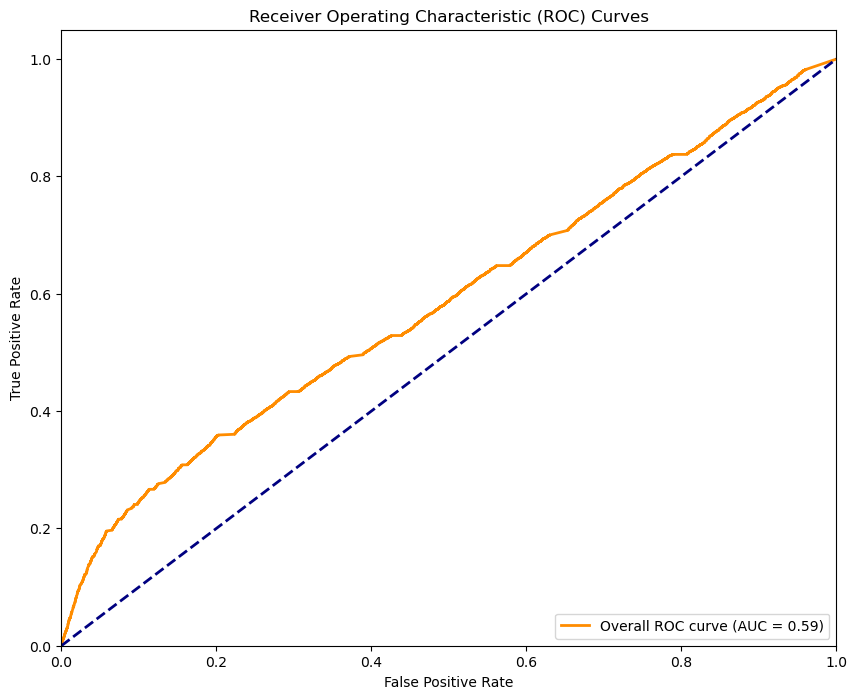

In [15]:
# Main execution
data_folder = "../datasets/UTS/NAB"
noise_scheduler = NoiseScheduler(
    num_timesteps=config.num_timesteps,
    beta_start=config.beta_start,
    beta_end=config.beta_end,
    beta_schedule=config.beta_schedule
)

all_dir_results = []

for root, dirs, files in os.walk(data_folder):
    for dir in dirs:
        data_path = os.path.join(data_folder, dir)
        result = process_directory(sequence_length, stride, input_size, data_path, base_config, TCN, noise_scheduler)
        all_dir_results.append(result)

# Compute and plot overall metrics
all_labels = np.concatenate([res['labels'] for res in all_dir_results])
all_scores = np.concatenate([res['scores'] for res in all_dir_results])

print("\nOverall IQR outliers classification report")
print(classification_report(all_labels, (np.array(all_scores) > 1.5).astype(int)))

fpr, tpr, thresholds = roc_curve(all_labels, all_scores)
roc_auc = auc(fpr, tpr)

all_dir_results.append({
    'dir': 'Overall',
    'labels': all_labels,
    'scores': all_scores,
    'fpr': fpr,
    'tpr': tpr,
    'roc_auc': roc_auc
})

# Save results to CSV
results_df = pd.DataFrame(all_dir_results)
results_df.to_csv(os.path.join(config.output_dir, f"per_directory_roc_results_{config.num_epochs}.csv"))

# Plot ROC curves
plt.figure(figsize=(10, 8))
for res in all_dir_results:
    if res['dir'] == 'Overall':
        plt.plot(res['fpr'], res['tpr'], color='darkorange', lw=2, label=f"Overall (AUC = {res['roc_auc']:.2f})")
    else:
        plt.plot(res['fpr'], res['tpr'], lw=1, label=f"{res['dir']} (AUC = {res['roc_auc']:.2f})")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.savefig(os.path.join(config.output_dir, f"one_by_one_roc_curves_{config.num_epochs}.png"))
plt.close()

print(f"\nOverall ROC AUC: {roc_auc:.4f}")

# plot ans save only the overall roc curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Overall ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.savefig(os.path.join(config.output_dir, f"one_by_oneoverall_roc_curve_{config.num_epochs}.png"))
plt.show()

In [16]:
# Extract AUC-ROC scores for the box plot
auc_scores = [res['roc_auc'] for res in all_dir_results if res['dir'] != 'Overall']

# Create the figure
plt.figure(figsize=(6, 8))  # Adjust the width to make it narrower

# Plot AUC-ROC box plot
sns.boxplot(y=auc_scores, color='lightpink', width=0.3)  # Reduced width for a narrower box

# Set the y-axis limits from 0 to 1
plt.ylim(0, 1)

# Customize the plot
plt.ylabel('AUC-ROC')
plt.title('Distribution of AUC-ROC Scores')

# Remove x-axis label and ticks
plt.xlabel('')
plt.xticks([])

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure
plt.tight_layout()
plt.savefig(os.path.join(config.output_dir, f"one_b_one_auc_roc_distribution_{config.num_epochs}.png"))
plt.close()

# Print summary statistics
print(f"\nAUC-ROC Score Distribution:")
print(f"Mean: {np.mean(auc_scores):.4f}")
print(f"Median: {np.median(auc_scores):.4f}")
print(f"Min: {np.min(auc_scores):.4f}")
print(f"Max: {np.max(auc_scores):.4f}")


AUC-ROC Score Distribution:
Mean: nan
Median: nan
Min: nan
Max: nan
